In [90]:
# Initial imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)
import tensorflow as tf
from pathlib import Path
import seaborn as sns

%matplotlib inline

In [91]:
# Load Data 
housing_df = pd.read_csv(Path("../../data/housing_data_TX_encoded.csv"), index_col="Date", parse_dates=True, infer_datetime_format=True)
housing_df

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Austin,RegionName_Beaumont,RegionName_Brownwood,RegionName_Converse,RegionName_Coppell,RegionName_Crosby,...,CountyName_Jefferson County,CountyName_McLennan County,CountyName_Montgomery County,CountyName_Rockwall County,CountyName_Smith County,CountyName_Tarrant County,CountyName_Tom Green County,CountyName_Travis County,CountyName_Val Verde County,CountyName_Williamson County
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,2,1,67653.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,2,89995.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,3,116641.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,4,167849.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2010-01-31,2,5,303323.0,133.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-29,1431,4,240716.0,57.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,2307,4,230132.0,110.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-29,1241,5,281139.0,72.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7808 entries, 2010-01-31 to 2020-02-29
Data columns (total 68 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Identifier                              7808 non-null   int64  
 1   Bedroom                                 7808 non-null   int64  
 2   Price                                   7719 non-null   float64
 3   Average_Market_Days                     6188 non-null   float64
 4   RegionName_Austin                       7808 non-null   int64  
 5   RegionName_Beaumont                     7808 non-null   int64  
 6   RegionName_Brownwood                    7808 non-null   int64  
 7   RegionName_Converse                     7808 non-null   int64  
 8   RegionName_Coppell                      7808 non-null   int64  
 9   RegionName_Crosby                       7808 non-null   int64  
 10  RegionName_Dallas                       78

In [93]:
housing_df= housing_df.dropna()

In [94]:
housing_df.corr()

,Identifier,Bedroom,Price,Average_Market_Days,RegionName_Austin,RegionName_Beaumont,RegionName_Brownwood,RegionName_Converse,RegionName_Coppell,RegionName_Crosby,...,CountyName_Jefferson County,CountyName_McLennan County,CountyName_Montgomery County,CountyName_Rockwall County,CountyName_Smith County,CountyName_Tarrant County,CountyName_Tom Green County,CountyName_Travis County,CountyName_Val Verde County,CountyName_Williamson County
Identifier,1.000000,-0.095509,-0.150784,-0.072748,-0.200095,-0.019185,0.197065,0.375844,0.187577,0.171119,...,-0.019185,0.003892,0.317524,0.246958,-0.033955,0.103333,0.098634,-0.200095,0.156786,0.075593
Bedroom,-0.095509,1.000000,0.708518,0.008762,0.057281,0.257764,0.036444,-0.098231,-0.100214,-0.021352,...,0.257764,-0.140284,-0.047884,0.072224,-0.140284,0.072224,-0.037777,0.057281,0.069294,-0.183248
Price,-0.150784,0.708518,1.000000,-0.159178,0.377967,0.124461,0.013171,-0.071818,-0.037096,-0.017573,...,0.124461,-0.214013,-0.028670,0.025954,-0.129573,0.030575,-0.109768,0.377967,0.039342,0.001194
Average_Market_Days,-0.072748,0.008762,-0.159178,1.000000,-0.125017,-0.025592,0.015363,-0.016283,-0.010454,0.103993,...,-0.025592,-0.098728,-0.044874,-0.017316,0.082377,0.016026,0.118933,-0.125017,-0.038941,-0.028252
RegionName_Austin,-0.200095,0.057281,0.377967,-0.125017,1.000000,-0.067188,-0.013341,-0.042715,-0.025718,-0.012655,...,-0.067188,-0.083148,-0.028381,-0.014617,-0.083148,-0.014617,-0.064860,1.000000,-0.025366,-0.047027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CountyName_Tarrant County,0.103333,0.072224,0.030575,0.016026,-0.014617,-0.008954,-0.001778,-0.005693,-0.003428,-0.001687,...,-0.008954,-0.011082,-0.003783,-0.001948,-0.011082,1.000000,-0.008644,-0.014617,-0.003381,-0.006268
CountyName_Tom Green County,0.098634,-0.037777,-0.109768,0.118933,-0.064860,-0.039735,-0.007890,-0.025261,-0.015210,-0.007484,...,-0.039735,-0.049173,-0.016785,-0.008644,-0.049173,-0.008644,1.000000,-0.064860,-0.015002,-0.027812
CountyName_Travis County,-0.200095,0.057281,0.377967,-0.125017,1.000000,-0.067188,-0.013341,-0.042715,-0.025718,-0.012655,...,-0.067188,-0.083148,-0.028381,-0.014617,-0.083148,-0.014617,-0.064860,1.000000,-0.025366,-0.047027
CountyName_Val Verde County,0.156786,0.069294,0.039342,-0.038941,-0.025366,-0.015540,-0.003086,-0.009880,-0.005948,-0.002927,...,-0.015540,-0.019231,-0.006564,-0.003381,-0.019231,-0.003381,-0.015002,-0.025366,1.000000,-0.010877


In [95]:
# Creating the X and y sets
X = housing_df.drop(columns=["Price", "Identifier", "State_TX", "Metro_Houston-The Woodlands-Sugar Land"]).values
y = housing_df["Price"]

<AxesSubplot:xlabel='Price', ylabel='Density'>

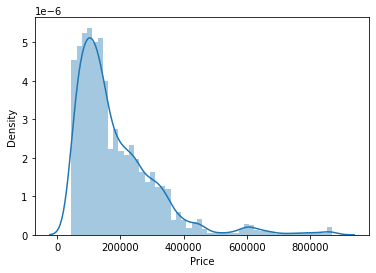

In [96]:
#SalePrice
sns.distplot(y)

In [97]:
#skewness
print("The skewness of SalePrice is {}".format(y.skew()))

The skewness of SalePrice is 2.0583542732791122


Skewness is 0.2524030237754883


<AxesSubplot:xlabel='Price', ylabel='Density'>

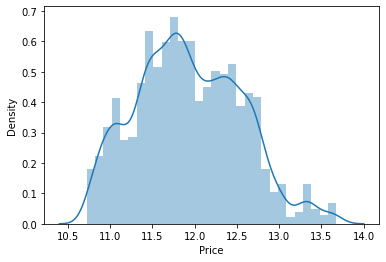

In [98]:
# Transforming the target variable to a normal distribution
target = np.log(y)
print ('Skewness is', target.skew())
sns.distplot(target)

In [99]:
y= y.values

In [100]:
# Creating training, validation, and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, train_size= 0.7, random_state=0)

In [101]:
X_train[0]

array([ 4., 53.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [102]:
# Import the StandardScaler from sklearn
#from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Scale the data
scaler = MinMaxScaler().fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [103]:
# Build and train the Deep Learning Model

# Import Keras modules for model creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [104]:
# Model set-up
number_input_features = 64
hidden_nodes_layer1 = 230
hidden_nodes_layer2 = 140

In [105]:
# Define the LSTM RNN model
model = Sequential()

# Layer 1
model.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Layer 2
model.add(Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(Dense(1, activation="linear"))

In [106]:
# Compile the model
model.compile(
    loss= "mean_squared_error",
    optimizer="adam",
    metrics= ['accuracy']
   
)

In [107]:
# Summarize the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 230)               14950     
_________________________________________________________________
dense_13 (Dense)             (None, 140)               32340     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 141       
Total params: 47,431
Trainable params: 47,431
Non-trainable params: 0
_________________________________________________________________


In [108]:
# Training the model
batch_size = 50
epochs = 1000
training_history = model.fit(
    X_scaled_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
)

ep - loss: 882342054.5455 - accuracy: 0.0000e+00
Epoch 826/1000
87/87 [==============================] - 0s 2ms/step - loss: 871079800.0000 - accuracy: 0.0000e+00
Epoch 827/1000
87/87 [==============================] - 0s 2ms/step - loss: 916140259.6364 - accuracy: 0.0000e+00
Epoch 828/1000
87/87 [==============================] - 0s 2ms/step - loss: 841997213.4545 - accuracy: 0.0000e+00
Epoch 829/1000
87/87 [==============================] - 0s 2ms/step - loss: 912733743.2727 - accuracy: 0.0000e+00
Epoch 830/1000
87/87 [==============================] - 0s 2ms/step - loss: 920133060.3636 - accuracy: 0.0000e+00
Epoch 831/1000
87/87 [==============================] - 0s 2ms/step - loss: 879275419.6364 - accuracy: 0.0000e+00
Epoch 832/1000
87/87 [==============================] - 0s 2ms/step - loss: 857440257.4545 - accuracy: 0.0000e+00
Epoch 833/1000
87/87 [==============================] - 0s 2ms/step - loss: 938609144.7273 - accuracy: 0.0000e+00
Epoch 834/1000
87/87 [=================

In [109]:
# Evaluate the model
model.evaluate(X_scaled_test, y_test, verbose=1)

58/58 [==============================] - 0s 2ms/step - loss: 840604800.0000 - accuracy: 0.0000e+00


[840604800.0, 0.0]

In [110]:
# Make predictions using the testing data X_test
predicted = model.predict(X_scaled_test)

In [111]:
# Create a DataFrame of Real and Predicted values
housing_model = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predicted.ravel()
}, index = housing_df.index[-len(y_test): ]) 

# Show the DataFrame's head
housing_model.head()

,Actual,Predicted
Date,,
2017-07-31,475249.0,481151.593750
2017-07-31,157452.0,158368.359375
2017-07-31,87672.0,97452.070312
2017-07-31,201200.0,210514.656250
2017-07-31,191375.0,210426.750000


In [112]:
housing_price__pred_20= housing_model[:20]
housing_price__pred_20

,Actual,Predicted
Date,,
2017-07-31,475249.0,481151.593750
2017-07-31,157452.0,158368.359375
2017-07-31,87672.0,97452.070312
2017-07-31,201200.0,210514.656250
2017-07-31,191375.0,210426.750000
2017-07-31,95496.0,101985.406250
2017-07-31,202087.0,212891.062500
2017-07-31,107756.0,101336.820312
2017-07-31,106817.0,124461.054688


<AxesSubplot:title={'center':'Actual Vs. Predicted Housing Prices in Texas'}, xlabel='Date'>

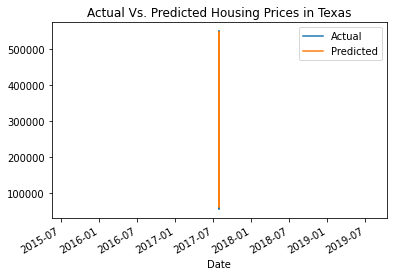

In [113]:
# Plot the real vs predicted prices as a line chart
housing_price__pred_20.plot(title="Actual Vs. Predicted Housing Prices in Texas")